# Note on titanic binary classification project

**Objective**: Predict the survival of passengers on the Titanic

https://www.kaggle.com/c/titanic/data


** Step 1 **: Load libraries

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf
import keras as k

from sklearn import preprocessing

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


** Step 2 **: Need to load data set from a csv file. Numpy's genfromtxt can be used, however, because ',' is present in string, use pandas's read_csv instead.

In [2]:
#load data sets
data_set = pd.read_csv('data/train.csv', delimiter=',', quotechar='"')
test_set = pd.read_csv('data/test.csv', delimiter=',', quotechar='"')

In [3]:
#have a look at the training data
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#data types in the training set
#train_set.dtypes

#missing data in 'Cabin'
print('Missing data in ''Cabin'' =', data_set['Cabin'].isnull().sum())

#total missing data
print('Missing data in each feature in training set:\n', data_set.isnull().sum())

#replacing missing values in 'Age' with median age
median_age = data_set['Age'].median()
data_set['Age'].fillna(median_age, inplace=True)
print('Median age =', median_age)
#print(train_set.isnull().sum())

#check missing values in test set
print('Missing data in each feature in test set:\n', test_set.isnull().sum())
#also replace mssing values in 'Age' with median age
median_age = test_set['Age'].median()
test_set['Age'].fillna(median_age, inplace=True)
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)
print('Median age in test set =', median_age)

Missing data in Cabin = 687
Missing data in each feature in training set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Median age = 28.0
Missing data in each feature in test set:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Median age in test set = 27.0


The shape of the training set is correctly (891, 12), and that of the test set (418, 11). Note that the test set has one fewer input feature because we don't know the survival of each passenger.

Next, determine the number of training examples n_train to be 891 and  number of test examples n_test 418.

In [5]:
n_train = data_set.shape[0]
n_test = test_set.shape[0]
n_x = data_set.shape[1]

print("Number of data examples: n_train = " + str(n_train))
print("Number of testing examples: n_test = " + str(n_test))
print("Number of features for each example: n_x = " + str(n_x))

Number of data examples: n_train = 891
Number of testing examples: n_test = 418
Number of features for each example: n_x = 12


In [6]:
# Different features in the data set
data_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Analyze input features
* `PassengerId` does not carry any meaningful information and can be ignored
* `Name`: maybe titles can be analyze for information on status but for now can be ignored
* `Embarked` gives the Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton. I think we can perhaps safely ignore this feature.
* `Cabin` may be useful, but a lot of data are missing and cannot be meaningfully filled in 
* `Ticket` does not appear to carry meaningful information and will be ignored for now

In [7]:
data_set['Ticket'].unique

<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870      

In [8]:
# Extract features for input X
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X = data_set[features]
n_features = X.shape[1]
print('Number of features to train = ', n_features)

y = data_set['Survived']

# print X
X.head()

Number of features to train =  6


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [9]:
# label gender
X['Sex'] = X['Sex'].map({'male' : 1, 'female' : 0})

X.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [10]:
#Extract the same features for X_test and label gender
X_test = test_set[features]
X_test['Sex'] = X_test['Sex'].map({'male' : 1, 'female' : 0})
X_test.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


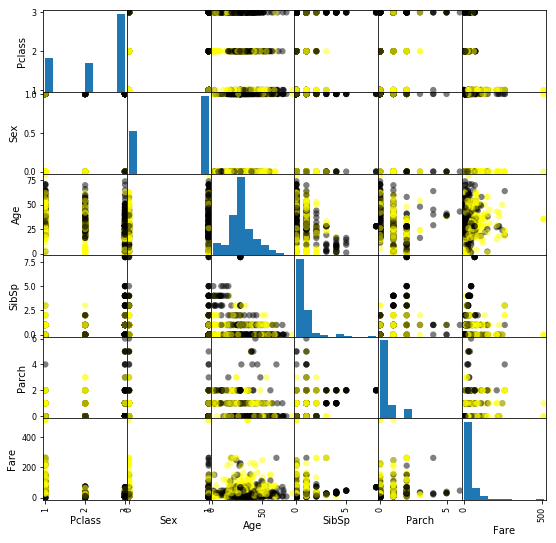

In [11]:
# plotting a scatter matrixb
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=40, hist_kwds={'bins':10}, figsize=(9,9), cmap=cmap)

It appears that there is a strong correlation between Sex and survival. Women tend to survive.
* (Sex, Fare): Women with higher fares seem to have a higher survival rate than women with lower fares. Men with the highest fares seemed to survive.
* (Sex, Parch): Women with fewer children/parents have higher survival rate. No clear trend for men.
* (Sex, SibSp): No clear trend for both men and women
* (Sex, Age): Not very clear trend for both men and women
* (Sex, Pclass): Women in 1st and 2nd class survived while women in 3rd class didn't. No clear trend for men.

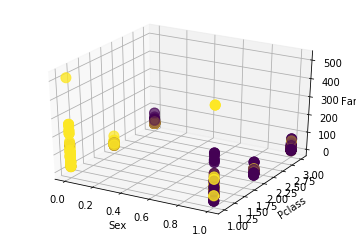

In [12]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['Sex'], X['Pclass'], X['Fare'], c = y, marker = 'o', s=100)
ax.set_xlabel('Sex')
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
plt.show()

In [13]:
# survival rate of female vs. male
data_set[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# survival rate with respect to Pclass
data_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
# survival rate with respect to SibSp
data_set[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
# survival rate with respect to Parch
data_set[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [17]:
#normalizing input features for both data sets using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=0)

print('Number of training examples: ', X_train.shape[0])
print('Number of examples for cross validation: ', X_dev.shape[0])

Number of training examples:  668
Number of examples for cross validation:  223


In [19]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)

#score for predictions on the dev set
print('Score for predictions on the training set using KNN: ', knnreg.score(X_train, y_train))
score = knnreg.score(X_dev, y_dev)
print('Score for predictions on the dev set using KNN: ', score)

Score for predictions on the training set using KNN:  0.6191269616184534
Score for predictions on the dev set using KNN:  0.33392214799588876


In [20]:
# linear regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
print('Score for predictions on the training set: ', linreg.score(X_train, y_train))
print('Score for predictions on the training set: ', linreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.38975759163295076
Score for predictions on the training set:  0.405393960631264


In [21]:
# ridge regression
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=20.0).fit(X_train, y_train)
print('Score for predictions on the training set: ', ridgereg.score(X_train, y_train))
print('Score for predictions on the training set: ', ridgereg.score(X_dev, y_dev))

Score for predictions on the training set:  0.373655989294157
Score for predictions on the training set:  0.3886917874652256


In [22]:
# lasso regression
from sklearn.linear_model import Lasso

lassoreg = Ridge(alpha=100.0, max_iter = 10000).fit(X_train, y_train)
print('Score for predictions on the training set: ', lassoreg.score(X_train, y_train))
print('Score for predictions on the training set: ', lassoreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.31299872043927623
Score for predictions on the training set:  0.32379695803508923


In [23]:
# logistic regression
from sklearn.linear_model import LogisticRegression

losreg = LogisticRegression(C = 100, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
print('Score for predictions on the training set: ', losreg.score(X_train, y_train))
print('Score for predictions on the training set: ', losreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.7919161676646707
Score for predictions on the training set:  0.8071748878923767


In [24]:
# random forest
from sklearn.ensemble import RandomForestRegressor

randreg = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train, y_train)
print('Score for predictions on the training set: ', randreg.score(X_train, y_train))
print('Score for predictions on the training set: ', randreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.8780228081745992
Score for predictions on the training set:  0.4410960491110837


In [25]:
# LSVM
from sklearn.svm import SVC

lsvm = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)
print('Score for predictions on the training set: ', lsvm.score(X_train, y_train))
print('Score for predictions on the training set: ', lsvm.score(X_dev, y_dev))

Score for predictions on the training set:  0.7889221556886228
Score for predictions on the training set:  0.7802690582959642


In [26]:
# SVM with RBF kernel (default option)
from sklearn.svm import SVC

rbf_svm = SVC(C=1.0, gamma='scale').fit(X_train, y_train)
print('Score for predictions on the training set: ', rbf_svm.score(X_train, y_train))
print('Score for predictions on the training set: ', rbf_svm.score(X_dev, y_dev))

Score for predictions on the training set:  0.8158682634730539
Score for predictions on the training set:  0.8026905829596412


In [27]:
# SVM with polynomial kernel
from sklearn.svm import SVC

poly_svm = SVC(C=1.0, kernel='poly', gamma='scale').fit(X_train, y_train)
print('Score for predictions on the training set: ', poly_svm.score(X_train, y_train))
print('Score for predictions on the training set: ', poly_svm.score(X_dev, y_dev))

Score for predictions on the training set:  0.8203592814371258
Score for predictions on the training set:  0.7982062780269058


In [28]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print('Score for predictions on the training set: ', tree.score(X_train, y_train))
print('Score for predictions on the training set: ', tree.score(X_dev, y_dev))

Score for predictions on the training set:  0.9805389221556886
Score for predictions on the training set:  0.7533632286995515


In [50]:
# Make predictions on unseen data using SVM
Y_pred = rbf_svm.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)
Y = pd.DataFrame(data=Y_pred, columns=['Survived'])
Y.insert(loc=0, column='PassengerId', value=test_set['PassengerId'])

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [51]:
Y.to_csv('data/submission_AR.csv', index=False)

In [53]:
print('Number of people who survived: ', Y['Survived'].sum())

Number of people who survived:  147
